# Прогнозирование оформления срочного депозита

### Импорт библиотек

In [329]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
%matplotlib inline

### 0. Описание задачи

В португальском банке произошло снижение доходов, и они хотели бы знать, какие действия предпринять. После расследования они обнаружили, что основная причина заключалась в том, что их клиенты недостаточно инвестировали в долгосрочные депозиты. Цель классификации состоит в том, чтобы предсказать, подпишется ли клиент (да/нет) на срочный депозит (переменная y).

### Признаки:</b>
| № |  Признак  | Тип | Описание  | 
| ------------- | ------------- | ------------- | ------------- | 
| 1 | age | числовой | возраст клиента |
| 2 | job | категориальный | вид деятельности |
| 3 | marital | категориальный | семейное положение |
| 4 | education | категориальный | образование |
| 5 | default | категориальный | возможность платы по кредиту |
| 6 | housing | категориальный | наличие жилищного кредита |
| 7 | loan | категориальный | наличие личного заема |
| 8 | contact | категориальный  | способ связи |
| 9 | month | категориальный | месяц последнего контакта |
| 10 | dayofweek | категориальный | день недели последнего контакта |
| 11 | duration | числовой | продолжительность последнего контакта (сек.) |
| 12 | campaign | числовой | количество контактов за время кампании |
| 13 | pdays | числовой | число дней с момента последнего контакта клиента по другой кампании |
| 14 | previous | числовой | количество контактов клиента, выполненных до этой кампании |
| 15 | poutcome | категориальный | результат предыдущей маркетинговой кампании  |
| Target variable | y | бинарный | оформил ли клиент вклад |


### 1. Чтение данных

### Подготовка dataset

In [332]:
url = "https://raw.githubusercontent.com/ITrickStar/ML-practice/master/new_train.csv"
dataset = pd.read_csv(url, engine='python')

Загрузим данные о клиентах банка.

In [273]:
print(dataset.shape[0], " - число объектов");
print(dataset.shape[1]-1, " - число признаков");
dataset.head(10)

32950  - число объектов
15  - число признаков


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,y
0,49,blue-collar,married,basic.9y,unknown,no,no,cellular,nov,wed,227,4,999,0,nonexistent,no
1,37,entrepreneur,married,university.degree,no,no,no,telephone,nov,wed,202,2,999,1,failure,no
2,78,retired,married,basic.4y,no,no,no,cellular,jul,mon,1148,1,999,0,nonexistent,yes
3,36,admin.,married,university.degree,no,yes,no,telephone,may,mon,120,2,999,0,nonexistent,no
4,59,retired,divorced,university.degree,no,no,no,cellular,jun,tue,368,2,999,0,nonexistent,no
5,29,admin.,single,university.degree,no,no,no,cellular,aug,wed,256,2,999,0,nonexistent,no
6,26,student,single,basic.9y,no,no,no,telephone,aug,wed,449,1,999,0,nonexistent,yes
7,30,blue-collar,married,basic.4y,no,yes,no,cellular,nov,wed,126,2,999,0,nonexistent,no
8,50,blue-collar,married,basic.4y,unknown,no,no,telephone,may,fri,574,1,999,0,nonexistent,no
9,33,admin.,single,high.school,no,yes,no,cellular,jul,tue,498,5,999,0,nonexistent,no


In [274]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          32950 non-null  int64 
 1   job          32950 non-null  object
 2   marital      32950 non-null  object
 3   education    32950 non-null  object
 4   default      32950 non-null  object
 5   housing      32950 non-null  object
 6   loan         32950 non-null  object
 7   contact      32950 non-null  object
 8   month        32950 non-null  object
 9   day_of_week  32950 non-null  object
 10  duration     32950 non-null  int64 
 11  campaign     32950 non-null  int64 
 12  pdays        32950 non-null  int64 
 13  previous     32950 non-null  int64 
 14  poutcome     32950 non-null  object
 15  y            32950 non-null  object
dtypes: int64(5), object(11)
memory usage: 4.0+ MB


Из полученной информации можно сделать вывод, что в dataset нет пропущенных значений.
Убедимся в этом:

In [275]:
check = dataset.isnull().sum()
check

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

### Обработка категориальных признаков

Некоторые признаки являются *категориальными*, но имеют типы *object* или *int64*, поэтому необходимо привести соответствующие столбцы к типу *category*.

In [276]:
categorical_indices = list(range(1,10)) + [14]
dataset.iloc[:,categorical_indices]=dataset.iloc[:,categorical_indices].astype('category')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32950 entries, 0 to 32949
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          32950 non-null  int64   
 1   job          32950 non-null  category
 2   marital      32950 non-null  category
 3   education    32950 non-null  category
 4   default      32950 non-null  category
 5   housing      32950 non-null  category
 6   loan         32950 non-null  category
 7   contact      32950 non-null  category
 8   month        32950 non-null  category
 9   day_of_week  32950 non-null  category
 10  duration     32950 non-null  int64   
 11  campaign     32950 non-null  int64   
 12  pdays        32950 non-null  int64   
 13  previous     32950 non-null  int64   
 14  poutcome     32950 non-null  category
 15  y            32950 non-null  object  
dtypes: category(10), int64(5), object(1)
memory usage: 1.8+ MB


Можно заметить, что остался один признак y типа object - целевой, он также является бинарным.

### 2. Вычисление основных характеристик и визуализация данных

Используя метод ```describe()```, получим сводную информацию о категориальных признаках:

In [277]:
dataset.describe(include = ['category'])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
count,32950,32950,32950,32950,32950,32950,32950,32950,32950,32950
unique,12,4,8,3,3,3,2,10,5,3
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent
freq,8314,19953,9736,26007,17254,27131,20908,11011,6857,28416


Информация о количественных признаках:

In [278]:
dataset.describe(include = ['number'])

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


Максимальное и минимальное значения признаков не похожи на выбросы, поэтому можно сделать вывод, что в таблице их нет

### Визуализация данных

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


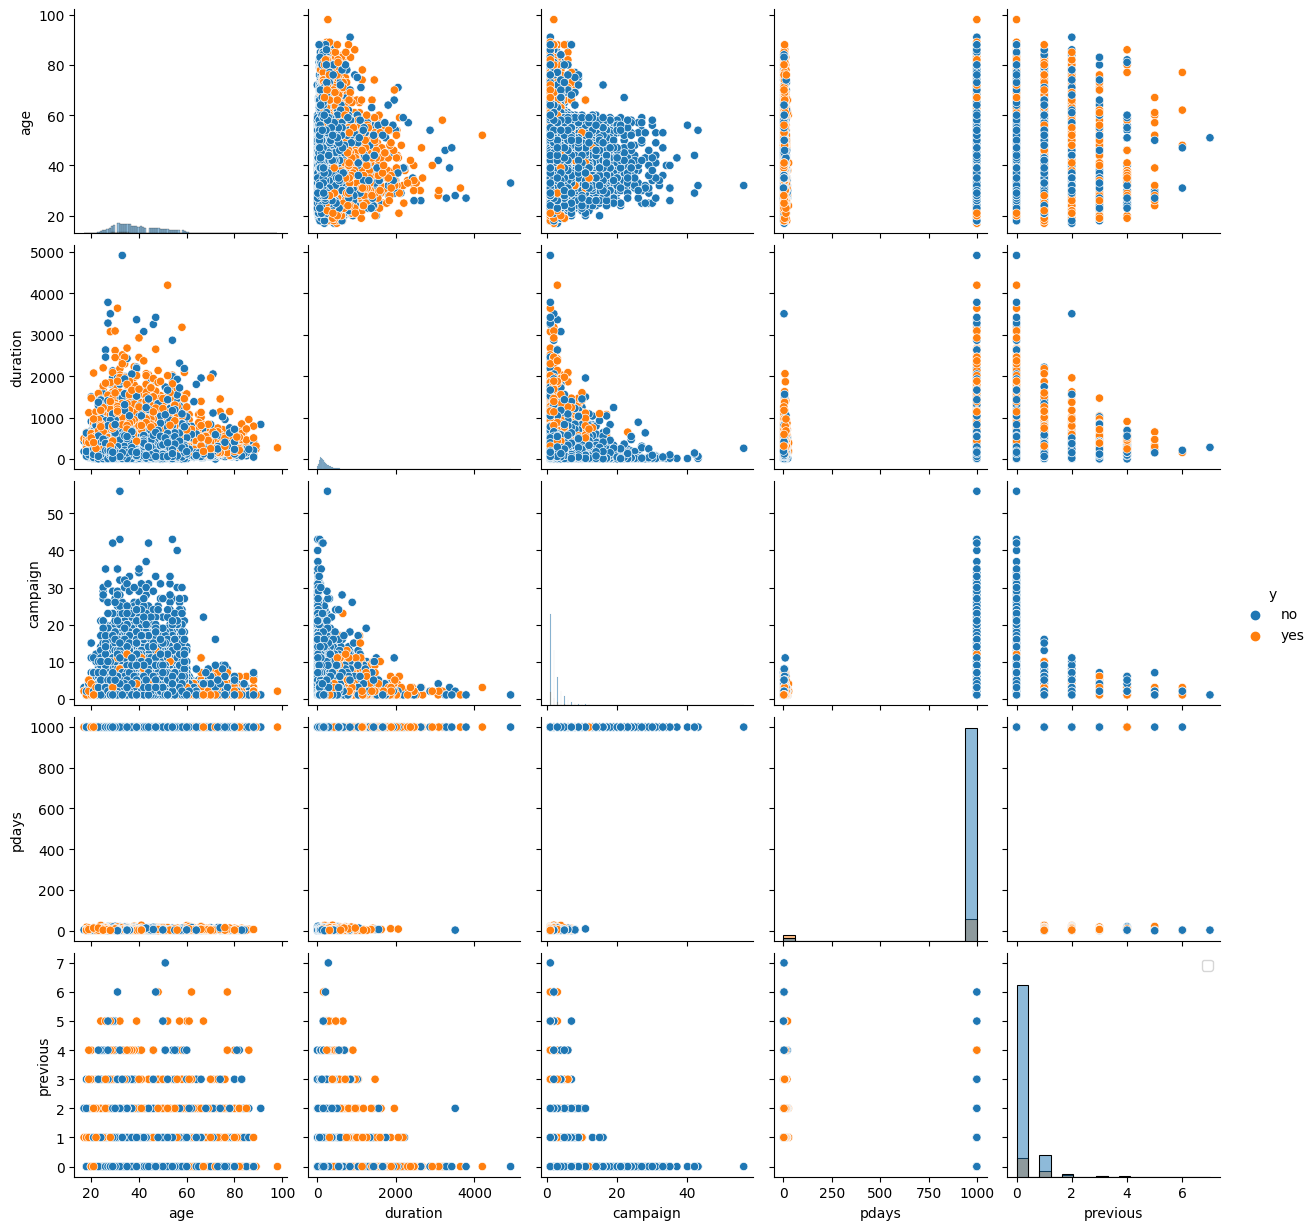

In [279]:
sns.pairplot(dataset, hue='y', diag_kind='hist')
plt.legend()

C:\Users\anoni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


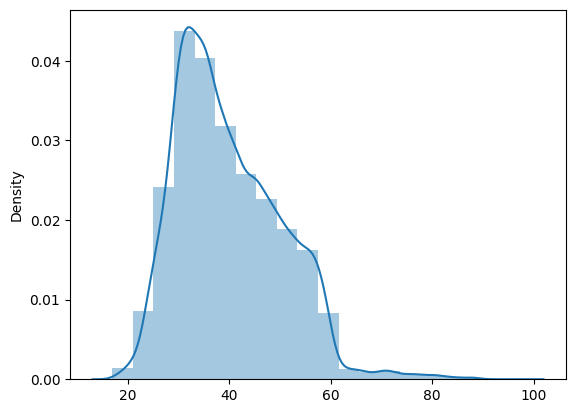

In [280]:
sns.distplot(dataset['age'].values, bins=20)
pass

Возраст клиентов сильно разнится, но наибольшее количество попадает в диапазон от 20 до 60 лет, что говорит о том, что банк намерен работать с людьми, которые работают и платежеспособны. 

C:\Users\anoni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


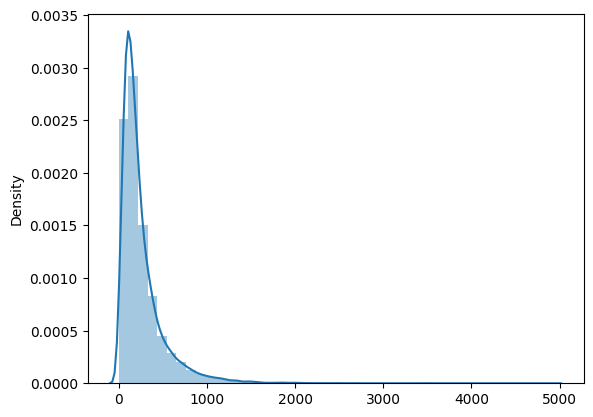

In [281]:
sns.distplot(dataset['duration'].values, bins=45)
pass

По графику видно, что контакт(звонок) длится чаще всего несколько минут.

C:\Users\anoni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


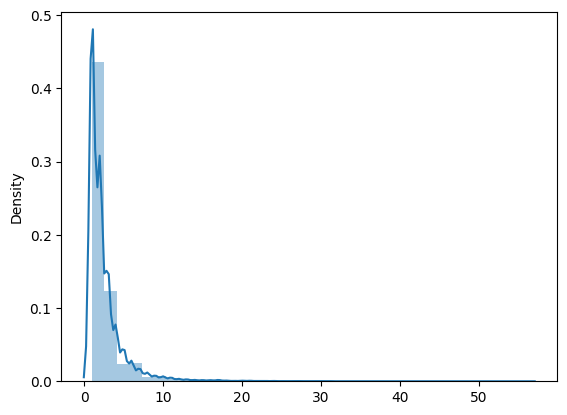

In [282]:
sns.distplot(dataset['campaign'].values, bins=35)
pass

Во время маркетинговой кампании с одним и тем же клиентом связывались чуть больше двух раз.

C:\Users\anoni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


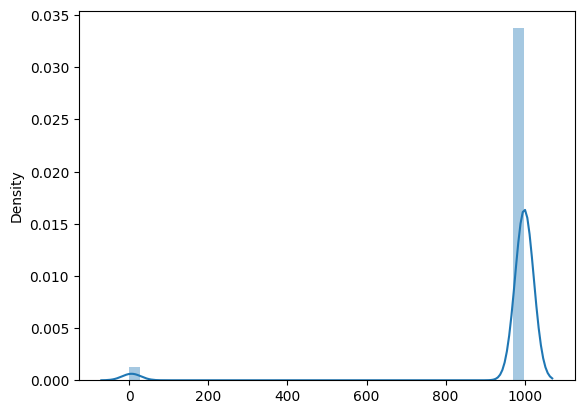

In [283]:
sns.distplot(dataset['pdays'].values, bins=35)
pass

C:\Users\anoni\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


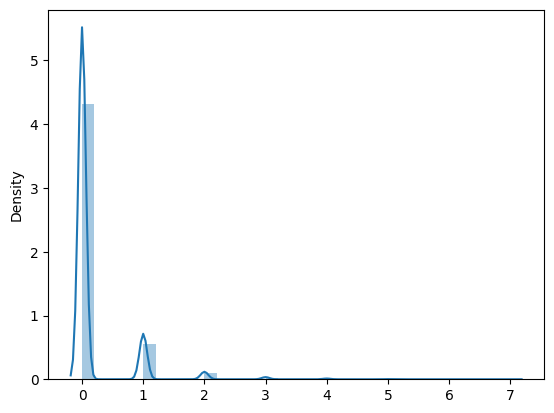

In [284]:
sns.distplot(dataset['previous'].values, bins=35)
pass

Параметры ```pdays``` и ```previous``` являются дискретными. По ним сложно, что либо сказать кроме того, что большинство клиентов учавствуют в кампании банка впервые. 

### Вычислим корелляционную матрицу:

In [285]:
corr_mat = dataset.corr()
corr_mat

,age,duration,campaign,pdays,previous
age,1.000000,-0.001841,0.003302,-0.032011,0.020670
duration,-0.001841,1.000000,-0.075663,-0.047127,0.022538
campaign,0.003302,-0.075663,1.000000,0.053795,-0.079051
pdays,-0.032011,-0.047127,0.053795,1.000000,-0.589601
previous,0.020670,0.022538,-0.079051,-0.589601,1.000000


Визуализируем матрицу при помощи тепловой карты:

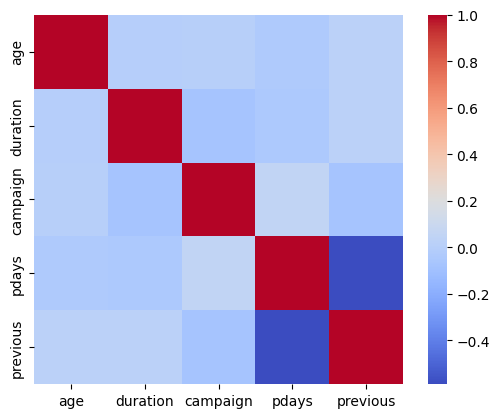

In [286]:
sns.heatmap(corr_mat, square=True, cmap='coolwarm')
pass

In [287]:
np.abs(corr_mat) > 0.33

,age,duration,campaign,pdays,previous
age,True,False,False,False,False
duration,False,True,False,False,False
campaign,False,False,True,False,False
pdays,False,False,False,True,True
previous,False,False,False,True,True


Выведем значения корреляции превышающие по модулю оптимальное.

In [288]:
corr_mat.where(np.triu(np.abs(corr_mat) > 0.33, k=1)).stack().sort_values(ascending=False)

pdays  previous   -0.589601
dtype: float64

Наличие отрицательной корреляции между этими двумя переменными можно объяснить тем, что у клиентов ранее не учавствовавших в финансовых кампаниях этот параметр указан как 999.

Из значений матрицы можно сделать вывод, что между признаками практически отсутствует какая-либо связь.

### Определим сбалансированность выборки

In [289]:
dataset.y.value_counts(bool)

no     0.887344
yes    0.112656
Name: y, dtype: float64

Отношение параметров показывает, что выборка не является оптимальной - 0.89/0.11

### 3. Обработка пропущенных значений

In [290]:
check = dataset.isnull().sum();
check

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
y              0
dtype: int64

Пропущенные значения отсутствуют.

### 4. Обработка категориальных признаков

В таблице категориальными признаками являются:

In [291]:
categorical_columns = [i for i in dataset.columns if dataset[i].dtype.name == 'category']
numerical_columns   = [i for i in dataset.columns if dataset[i].dtype.name != 'category']
print(categorical_columns)
print(numerical_columns)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']
['age', 'duration', 'campaign', 'pdays', 'previous', 'y']


Уберем выходной столбец **y**.

In [292]:
numerical_columns = numerical_columns[:len(numerical_columns)-1]

In [293]:
print(numerical_columns)

['age', 'duration', 'campaign', 'pdays', 'previous']


In [294]:
for i in categorical_columns:
    print(i, dataset[i].unique())

job ['blue-collar', 'entrepreneur', 'retired', 'admin.', 'student', ..., 'self-employed', 'management', 'unemployed', 'unknown', 'housemaid']
Length: 12
Categories (12, object): ['admin.', 'blue-collar', 'entrepreneur', 'housemaid', ..., 'student', 'technician', 'unemployed', 'unknown']
marital ['married', 'divorced', 'single', 'unknown']
Categories (4, object): ['divorced', 'married', 'single', 'unknown']
education ['basic.9y', 'university.degree', 'basic.4y', 'high.school', 'professional.course', 'unknown', 'basic.6y', 'illiterate']
Categories (8, object): ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'illiterate', 'professional.course', 'university.degree', 'unknown']
default ['unknown', 'no', 'yes']
Categories (3, object): ['no', 'unknown', 'yes']
housing ['no', 'yes', 'unknown']
Categories (3, object): ['no', 'unknown', 'yes']
loan ['no', 'yes', 'unknown']
Categories (3, object): ['no', 'unknown', 'yes']
contact ['cellular', 'telephone']
Categories (2, object): ['cellular', 

In [295]:
data_describe = dataset.describe(include = ['category'])
binary_columns    = [i for i in categorical_columns if data_describe[i]['unique'] == 2] # бинарные категориальные признаки
nonbinary_columns = [i for i in categorical_columns if data_describe[i]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['contact'] ['job', 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'poutcome']


In [296]:
dataset['contact'].unique()

['cellular', 'telephone']
Categories (2, object): ['cellular', 'telephone']

In [297]:
dataset['contact'] = pd.factorize(dataset['contact'])[0]
dataset['contact'].describe()

count    32950.000000
mean         0.365463
std          0.481567
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: contact, dtype: float64

In [298]:
dataset['y'] = pd.factorize(dataset['y'])[0]
dataset['y'].describe()

count    32950.000000
mean         0.112656
std          0.316176
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: y, dtype: float64

In [299]:
data_nonbinary = pd.get_dummies(dataset[nonbinary_columns])
print(data_nonbinary.columns)

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'month_apr', 'month_aug', 'month_dec',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'day_of_week_fri', 'day_of_week_mon',
       'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed',
       'poutcome_failure', 'poutcome_nonexistent', 'poutcome_succes

In [300]:
dataset[nonbinary_columns]

,job,marital,education,default,housing,loan,month,day_of_week,poutcome
0,blue-collar,married,basic.9y,unknown,no,no,nov,wed,nonexistent
1,entrepreneur,married,university.degree,no,no,no,nov,wed,failure
2,retired,married,basic.4y,no,no,no,jul,mon,nonexistent
3,admin.,married,university.degree,no,yes,no,may,mon,nonexistent
4,retired,divorced,university.degree,no,no,no,jun,tue,nonexistent
...,...,...,...,...,...,...,...,...,...
32945,services,single,high.school,no,yes,no,jul,tue,nonexistent
32946,technician,married,professional.course,no,yes,no,nov,fri,failure
32947,admin.,married,basic.9y,no,no,yes,jul,mon,nonexistent
32948,admin.,married,university.degree,no,no,no,may,fri,nonexistent


In [301]:
data_nonbinary.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [302]:
len(data_nonbinary.columns)

51

### 5. Нормализация количественных признаков

In [303]:
data_numerical = dataset[numerical_columns]
data_numerical.describe()

,age,duration,campaign,pdays,previous
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,40.014112,258.127466,2.560607,962.052413,0.174719
std,10.403636,258.975917,2.752326,187.951096,0.499025
min,17.000000,0.000000,1.000000,0.000000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000
max,98.000000,4918.000000,56.000000,999.000000,7.000000


Для лучшей работы многих алгоритмов машинного обучений необходима **нормализация** данных. Выполним стантартизацию (приведение std разброса к значению 1) количественных признаков.

In [304]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)
data_numerical.describe()

,age,duration,campaign,pdays,previous
count,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04
mean,2.532724e-16,-6.695706e-17,-1.903047e-17,-3.159166e-16,-4.188860e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.212122e+00,-9.967238e-01,-5.670139e-01,-5.118632e+00,-3.501216e-01
25%,-7.703184e-01,-5.990034e-01,-5.670139e-01,1.965809e-01,-3.501216e-01
50%,-1.935970e-01,-3.016785e-01,-2.036848e-01,1.965809e-01,-3.501216e-01
75%,6.714852e-01,2.350509e-01,1.596443e-01,1.965809e-01,-3.501216e-01
max,5.573617e+00,1.799346e+01,1.941609e+01,1.965809e-01,1.367724e+01


In [305]:
dataset.columns
dataset
dataset[numerical_columns]

,age,duration,campaign,pdays,previous
0,49,227,4,999,0
1,37,202,2,999,1
2,78,1148,1,999,0
3,36,120,2,999,0
4,59,368,2,999,0
...,...,...,...,...,...
32945,28,192,1,999,0
32946,52,64,1,999,1
32947,54,131,4,999,0
32948,29,165,1,999,0


### Объединим все таблицы в одну

In [306]:
data_numerical.describe()

,age,duration,campaign,pdays,previous
count,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04
mean,2.532724e-16,-6.695706e-17,-1.903047e-17,-3.159166e-16,-4.188860e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-2.212122e+00,-9.967238e-01,-5.670139e-01,-5.118632e+00,-3.501216e-01
25%,-7.703184e-01,-5.990034e-01,-5.670139e-01,1.965809e-01,-3.501216e-01
50%,-1.935970e-01,-3.016785e-01,-2.036848e-01,1.965809e-01,-3.501216e-01
75%,6.714852e-01,2.350509e-01,1.596443e-01,1.965809e-01,-3.501216e-01
max,5.573617e+00,1.799346e+01,1.941609e+01,1.965809e-01,1.367724e+01


In [307]:
data_nonbinary.describe()


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
count,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,...,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,0.252322,0.225827,0.035205,0.025948,0.071168,0.041457,0.033354,0.096995,0.021578,0.163885,...,0.017815,0.014082,0.191866,0.206737,0.208103,0.195569,0.197724,0.104067,0.862398,0.033536
std,0.434351,0.418132,0.184300,0.158984,0.257110,0.199347,0.179561,0.295956,0.145304,0.370177,...,0.132280,0.117831,0.393775,0.404972,0.405957,0.396644,0.398289,0.305352,0.344487,0.180033
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [308]:
dataset[binary_columns].describe()

,contact
count,32950.000000
mean,0.365463
std,0.481567
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [309]:
data = pd.concat((data_numerical, data_nonbinary, dataset[binary_columns], dataset['y']), axis = 1)

In [310]:
data.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,contact,y
0,0.863726,-0.120194,0.522973,0.196581,-0.350122,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,-0.289717,-0.216729,-0.203685,0.196581,1.653788,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2,3.651213,3.436121,-0.567014,0.196581,-0.350122,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,-0.385837,-0.533360,-0.203685,0.196581,-0.350122,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,1.824928,0.424258,-0.203685,0.196581,-0.350122,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


In [311]:
data.describe()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,contact,y
count,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,3.295000e+04,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,...,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000,32950.000000
mean,2.532724e-16,-6.695706e-17,-1.903047e-17,-3.159166e-16,-4.188860e-17,0.252322,0.225827,0.035205,0.025948,0.071168,...,0.191866,0.206737,0.208103,0.195569,0.197724,0.104067,0.862398,0.033536,0.365463,0.112656
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.434351,0.418132,0.184300,0.158984,0.257110,...,0.393775,0.404972,0.405957,0.396644,0.398289,0.305352,0.344487,0.180033,0.481567,0.316176
min,-2.212122e+00,-9.967238e-01,-5.670139e-01,-5.118632e+00,-3.501216e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.703184e-01,-5.990034e-01,-5.670139e-01,1.965809e-01,-3.501216e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,-1.935970e-01,-3.016785e-01,-2.036848e-01,1.965809e-01,-3.501216e-01,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,6.714852e-01,2.350509e-01,1.596443e-01,1.965809e-01,-3.501216e-01,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,5.573617e+00,1.799346e+01,1.941609e+01,1.965809e-01,1.367724e+01,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [328]:
data.head()

,age,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,...,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success,contact,y
0,0.863726,-0.120194,0.522973,0.196581,-0.350122,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
1,-0.289717,-0.216729,-0.203685,0.196581,1.653788,0,0,1,0,0,...,0,0,0,0,1,1,0,0,1,0
2,3.651213,3.436121,-0.567014,0.196581,-0.350122,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3,-0.385837,-0.533360,-0.203685,0.196581,-0.350122,1,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
4,1.824928,0.424258,-0.203685,0.196581,-0.350122,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0


### 6. Разбиваем данные на обучающую и тестовую выборки

In [313]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn import ensemble

In [314]:
from sklearn.model_selection import train_test_split

X = data.drop('y', axis = 1)
y = data['y']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((23065, 57), (9885, 57), (23065,), (9885,))

### 7. kNN - метод k ближайших соседей

#### 1 сосед

In [315]:
knn = KNeighborsClassifier(n_neighbors = 1)
knn.fit(X_train, y_train)
print(knn)

err_train =  1 - knn.score(X_train, y_train)
err_test =  1 - knn.score(X_test, y_test)
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

knn.get_params()

KNeighborsClassifier(n_neighbors=1)
Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.12129489124936776


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 1,
 'p': 2,
 'weights': 'uniform'}

#### 2 соседа

In [316]:
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, y_train)
print(knn)

err_train =  1 - knn.score(X_train, y_train)
err_test =  1 - knn.score(X_test, y_test)
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=2)
Ошибка на обучающей выборке:  0.0700628658140039
Ошибка на тестовой выборке:  0.11138088012139602


#### 5 соседей

In [317]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print(knn)

err_train =  1 - knn.score(X_train, y_train)
err_test =  1 - knn.score(X_test, y_test)
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier()
Ошибка на обучающей выборке:  0.0779969650986343
Ошибка на тестовой выборке:  0.10207384926656549


#### Попробуем найти оптимальное решение

In [318]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid = {'n_neighbors': range(1, 35)}, cv = 5)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print('Кросс-валидационная ошибка: ', best_cv_err)
print('Оптимальное количество соседей: ', best_n_neighbors)

Кросс-валидационная ошибка:  0.09872100585302412
Оптимальное количество соседей:  12


In [319]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(X_train, y_train)
print(knn)

err_train =  1 - knn.score(X_train, y_train)
err_test =  1 - knn.score(X_test, y_test)
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

KNeighborsClassifier(n_neighbors=12)
Ошибка на обучающей выборке:  0.0900498590938652
Ошибка на тестовой выборке:  0.09914011127971678


### 8. Анализ ошибок на обучающей и тестовых выборках

Оценим метод при помощи матрицы ошибок:

На обучающей выборке

In [320]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_train_prediction = knn.predict(X_train)
confusion_matrix(y_train, y_train_prediction)

array([[20208,   307],
       [ 1770,   780]], dtype=int64)

C:\Users\anoni\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


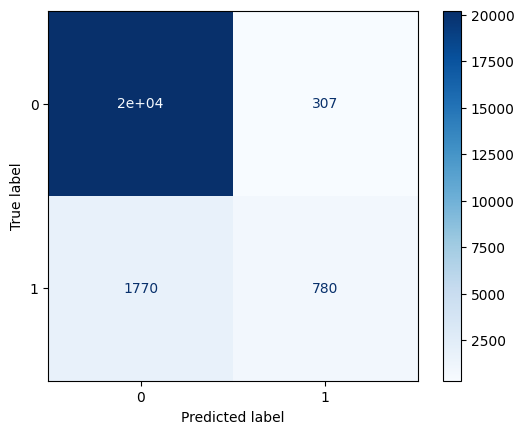

In [321]:
plot_confusion_matrix(knn, X_train, y_train, cmap=plt.cm.Blues)

На тестовой выборке

In [322]:
y_test_prediction = knn.predict(X_test)
confusion_matrix(y_test, y_test_prediction)

array([[8552,  171],
       [ 809,  353]], dtype=int64)

In [323]:
from sklearn.metrics import mean_squared_error, r2_score

MSE_train = mean_squared_error(y_train, y_train_prediction)
MSE_test  = mean_squared_error(y_test,  y_test_prediction)
R2_train = r2_score(y_train, y_train_prediction)
R2_test  = r2_score(y_test,  y_test_prediction)

MSE_train, MSE_test, R2_train, R2_test

(0.09004985909386516,
 0.09914011127971674,
 0.08424720314643042,
 0.04427983630037746)

In [324]:
np.sqrt(MSE_train), np.sqrt(MSE_test)

(0.3000830869840304, 0.3148652271682549)

### 9. Другие классификаторы

#### Support Vector Machine

In [327]:
svc = SVC(gamma = 'auto')
svc.fit(X_train, y_train)

err_train = np.mean(y_train != svc.predict(X_train))
err_test  = np.mean(y_test  != svc.predict(X_test))
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.09668328636462171
Ошибка на тестовой выборке:  0.10116337885685382


#### Random Forest

In [ ]:
rf = ensemble.RandomForestClassifier(n_estimators = 100)
rf.fit(X_train, y_train)

err_train =  1 - rf.predict(X_train, y_train)
err_test =  1 - rf.predict(X_test, y_test)
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.09782498735457765


#### Extremely Randomized Trees

In [ ]:
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, y_train)

err_train =  1 - ert.predict(X_train, y_train)
err_test =  1 - ert.predict(X_test, y_test)
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.0
Ошибка на тестовой выборке:  0.11058509346928866


#### AdaBoost

In [ ]:
ada = ensemble.AdaBoostClassifier(n_estimators = 100)
ada.fit(X_train, y_train)

err_train =  1 - ada.predict(X_train, y_train)
err_test =  1 - ada.predict(X_test, y_test)
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.09214146973130463
Ошибка на тестовой выборке:  0.10014566642388929


#### GBT

In [ ]:
gbt = ensemble.GradientBoostingClassifier(n_estimators = 100)
gbt.fit(X_train, y_train)

err_train =  1 - gbt.predict(X_train, y_train)
err_test =  1 - gbt.predict(X_test, y_test)
print('Ошибка на обучающей выборке: ', err_train)
print('Ошибка на тестовой выборке: ', err_test)

Ошибка на обучающей выборке:  0.08182259630948527
Ошибка на тестовой выборке:  0.09444039815489197


### 11. Исключение коррелированных переменных

Корреляция между признаками минимальна.

## Выводы

### По выборке

1) Выборка является несбалансированной (11/89)
2) Пропущенные значения отсутствуют
2) Корреляция между переменными отсутствует
3) Выбросы отсутствуют
4) Присутствуют разнородные признаки
5) Присутствуют текстовые признаки


### По результатам классификации

* Алгоритм **kNN** оптимальное количество соседей составило 12 с ошибкой на обучающей выборке ~ 9% и с ошибкой на тестовой выборке ~ 10%
* Алгоритм **SVM** ошибка на обучающей выборке - 9%, ошибка на тестовой выборке ~ 10%
* Алгоритм **Random Forest**: ошибка на обучающей выборке - 0%, ошибка на тестовой выборке ~ 9.7%
* Алгоритм **Extremely Randomized Trees**: ошибка на обучающей выборке - 0%, ошибка на тестовой выборке ~ 11%
* Алгоритм **AdaBoost**: ошибка на обучающей выборке - 9.2%, ошибка на тестовой выборке ~ 10%
* Алгоритм **GBT**: ошибка на обучающей выборке - 8.1%, ошибка на тестовой выборке ~ 9.4%
* Лучше всех себя показал алгоритм **GBT**, так как имеет наименьшую ошибку на тестовой выборке (~ 9.4%) и оптимальную на обучающей (~ 8.1%)
